In [3]:
import xarray as xr
import pathlib
import sys
from dor_config import DORConfig

import ndpyramid
import dask
from vis_pyramid import reduction, concatenate_into_bands, reshape_into_month_year, load_ssh_data

In [4]:
config = DORConfig()
config

DORConfig(scratch_env='/pscratch/sd/a/abanihi', parent_data_dir='/global/cfs/projectdirs/m4746/Datasets/Ocean-CDR-Atlas-v0/DOR-Efficiency-Map', data_archive_dir='/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/archive', store_1_path='/pscratch/sd/a/abanihi/test/store1b.zarr', store_2_path='/pscratch/sd/a/abanihi/test/store2.zarr', cumulative_fg_co2_percent_store_path='/pscratch/sd/a/abanihi/test/cumulative_FG_CO2_percent.zarr')

In [5]:
dask.config.set({'distributed.link.dashboard': '/proxy/{port}/status'})

In [6]:
scratch = config.scratch_dir
out_path_prefix = config.compressed_data_dir

In [7]:
parent_dir = pathlib.Path.cwd().parent
sys.path.append(str(parent_dir))

In [8]:

# from distributed import Client
# client = Client(scheduler_file="/pscratch/sd/a/abanihi/scheduler_file.json")
# client

In [9]:
out_path_prefix

PosixPath('/global/cfs/projectdirs/m4746/Datasets/Ocean-CDR-Atlas-v0/DOR-Efficiency-Map/research-grade-compressed')

In [10]:
polygon_ids = range(0, 690)
padded_polygon_ids = [f"{polygon_id:03d}" for polygon_id in polygon_ids]
injection_months = [1, 4, 7, 10]
padded_injection_months = [
    f"{injection_month:02d}" for injection_month in injection_months
]


def get_glob_pattern(polygon_id, injection_month):
    glob_template = f"{out_path_prefix}/{{}}/{{}}/*.nc"
    path = glob_template.format(polygon_id, injection_month)
    return path


path = get_glob_pattern(padded_polygon_ids[0], padded_injection_months[0])
path

'/global/cfs/projectdirs/m4746/Datasets/Ocean-CDR-Atlas-v0/DOR-Efficiency-Map/research-grade-compressed/000/01/*.nc'

In [11]:
%%time
with dask.config.set(scheduler="processes"):
    ds = xr.open_mfdataset(
        path,
        coords="minimal",
        combine="by_coords",
        data_vars="minimal",
        compat="override",
        decode_timedelta=True,
        decode_times=True,
        parallel=True,
    )  # .chunk({'elapsed_time': -1})
    ds = dask.optimize(ds)[0]
ds

CPU times: user 10.5 s, sys: 775 ms, total: 11.3 s
Wall time: 27.8 s


<xarray.Dataset> Size: 82GB
Dimensions:                     (polygon_id: 1, injection_date: 1,
                                 elapsed_time: 180, z_t: 60, nlat: 384,
                                 nlon: 320, z_t_150m: 15, z_w: 60, z_w_top: 60,
                                 z_w_bot: 60)
Coordinates: (12/63)
  * z_t                         (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 60B 500.0 ... 1.45e+04
  * z_w                         (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 240B 0.0 1e+03 ... 5.25e+05
  * z_w_bot                     (z_w_bot) float32 240B 1e+03 2e+03 ... 5.5e+05
    dz                          (z_t) float32 240B dask.array<chunksize=(60,), meta=np.ndarray>
    ...                          ...
    nsurface_t                  float64 8B ...
    nsurface_u                  float64 8B ...
    area_m2                     (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * polygon_id                  (polygon_id) int32 4B 0
  * injection_date              (injection_date) object 8B 1999-01-01 00:00:00
  * elapsed_time                (elapsed_time) timedelta64[ns] 1kB 0 days ......
Dimensions without coordinates: nlat, nlon
Data variables: (12/46)
    CO3                         (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    HCO3                        (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    H2CO3                       (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    pH_3D                       (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    CO3_ALT_CO2                 (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    pH_3D_ALT_CO2               (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    ...                          ...
    STF_ALK_ALT_CO2             (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    IAGE                        (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    tend_zint_100m_DIC          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_DIC_ALT_CO2  (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_ALK          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_ALK_ALT_CO2  (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
Attributes:
    title:             smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_19...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2024-11-04 at 21:08:03.3
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [12]:
ssh = load_ssh_data(padded_injection_months[0]).SSH
ssh

<xarray.DataArray 'SSH' (elapsed_time: 180, nlat: 384, nlon: 320)> Size: 88MB
dask.array<getitem, shape=(180, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    ULONG         (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT          (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG         (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT          (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * elapsed_time  (elapsed_time) timedelta64[ns] 1kB 0 days ... 5444 days
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

In [25]:
ssh * 0.01

<xarray.DataArray 'SSH' (elapsed_time: 180, nlat: 384, nlon: 320)> Size: 88MB
dask.array<mul, shape=(180, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    ULONG         (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT          (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG         (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT          (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * elapsed_time  (elapsed_time) timedelta64[ns] 1kB 0 days ... 5444 days
Dimensions without coordinates: nlat, nlon

In [13]:
bands_ds = (
                ds.pipe(reduction, ssh)
                .pipe(concatenate_into_bands)
                .pipe(reshape_into_month_year)
            )
bands_ds

/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/xarray/core/dataset.py:2794: UserWarning: Dimensions {'z_t'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'nlat': 384, 'nlon': 320, 'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 180, 'band': 2})
  indexers = drop_dims_from_indexers(indexers, self.dims, missing_dims)


<xarray.Dataset> Size: 887MB
Dimensions:         (month: 12, year: 15, polygon_id: 1, injection_date: 1,
                     band: 2, nlat: 384, nlon: 320)
Coordinates:
  * month           (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * year            (year) int32 60B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * polygon_id      (polygon_id) int32 4B 0
  * injection_date  (injection_date) float32 4B 1.0
  * band            (band) <U12 96B 'delta' 'experimental'
    ULONG           (nlat, nlon) float64 983kB 321.1 322.3 323.4 ... nan nan nan
    ULAT            (nlat, nlon) float64 983kB -78.95 -78.95 -78.95 ... nan nan
    elapsed_time    (month, year) timedelta64[ns] 1kB 0 days ... 5444 days
Dimensions without coordinates: nlat, nlon
Data variables:
    DIC_SURF        (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    DIC             (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    PH              (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    FG              (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    pCO2SURF        (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>

- DIC anomaly/full field (only at surface)
    - delta: `ds.DIC.isel(z_t=0) - ds.DIC_ALT_CO2.isel(z_t=0)`
    - experimental: `ds.DIC.isel(z_t=0)`
- DIC (column integrated)
    - delta: `integrate_column(ds.DIC) - integrate_column(ds.DIC_ALT_CO2)`
    - experimental: `integrate_column(ds.DIC)`
- pCO2 (only at surface)
    - delta: `ds.pCO2SURF - ds.pCO2SURF_ALT_CO2`
    - experimental: `ds.pCO2SURF`
- Flux (only at surface)
    - delta: `ds.FG_CO2 - ds.FG_ALT_CO2`
    - experimental: `ds.FG_CO2`
- Surface pH (only at surface)
    - delta: `ds.PH - ds.PH_ALT_CO2`
    - experimental: `ds.PH`

In [14]:
bands_ds = ds.pipe(reduction, ssh).pipe(concatenate_into_bands).pipe(reshape_into_month_year)
bands_ds

/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/xarray/core/dataset.py:2794: UserWarning: Dimensions {'z_t'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'nlat': 384, 'nlon': 320, 'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 180, 'band': 2})
  indexers = drop_dims_from_indexers(indexers, self.dims, missing_dims)


<xarray.Dataset> Size: 887MB
Dimensions:         (month: 12, year: 15, polygon_id: 1, injection_date: 1,
                     band: 2, nlat: 384, nlon: 320)
Coordinates:
  * month           (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * year            (year) int32 60B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * polygon_id      (polygon_id) int32 4B 0
  * injection_date  (injection_date) float32 4B 1.0
  * band            (band) <U12 96B 'delta' 'experimental'
    ULONG           (nlat, nlon) float64 983kB 321.1 322.3 323.4 ... nan nan nan
    ULAT            (nlat, nlon) float64 983kB -78.95 -78.95 -78.95 ... nan nan
    elapsed_time    (month, year) timedelta64[ns] 1kB 0 days ... 5444 days
Dimensions without coordinates: nlat, nlon
Data variables:
    DIC_SURF        (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    DIC             (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    PH              (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    FG              (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>
    pCO2SURF        (band, polygon_id, injection_date, nlat, nlon, month, year) float32 177MB dask.array<chunksize=(1, 1, 1, 384, 320, 1, 1), meta=np.ndarray>

In [15]:
# weights_pyramid = ndpyramid.regrid.generate_weights_pyramid(bands_ds, levels=2)
# weights_pyramid

In [16]:
%%time
dt = ndpyramid.pyramid_regrid(bands_ds, levels=2, parallel_weights=False)
dt

CPU times: user 8.4 s, sys: 1.21 s, total: 9.61 s
Wall time: 9.97 s


<xarray.DataTree>
Group: /
│   Attributes:
│       multiscales:  [{'datasets': [{'path': '0', 'level': 0, 'crs': 'EPSG:3857'...
│       title:        multiscale data pyramid
│       version:      0.4.0
├── Group: /0
│       Dimensions:         (band: 2, polygon_id: 1, injection_date: 1, month: 12,
│                            year: 15, y: 128, x: 128)
│       Coordinates:
│         * month           (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
│         * year            (year) int32 60B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
│         * polygon_id      (polygon_id) int32 4B 0
│         * injection_date  (injection_date) float32 4B 1.0
│         * band            (band) <U12 96B 'delta' 'experimental'
│           elapsed_time    (month, year) int32 720B dask.array<chunksize=(12, 15), meta=np.ndarray>
│         * x               (x) float32 512B -1.988e+07 -1.957e+07 ... 1.988e+07
│         * y               (y) float32 512B 1.988e+07 1.957e+07 ... -1.988e+07
│       Data variables:
│           DIC_SURF        (band, polygon_id, injection_date, month, year, y, x) float32 24MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
│           DIC             (band, polygon_id, injection_date, month, year, y, x) float32 24MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
│           PH              (band, polygon_id, injection_date, month, year, y, x) float32 24MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
│           FG              (band, polygon_id, injection_date, month, year, y, x) float32 24MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
│           pCO2SURF        (band, polygon_id, injection_date, month, year, y, x) float32 24MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
│       Attributes:
│           regrid_method:  bilinear
│           multiscales:    [{'datasets': [{'path': '.', 'level': 0, 'crs': 'EPSG:385...
└── Group: /1
        Dimensions:         (band: 2, polygon_id: 1, injection_date: 1, month: 12,
                             year: 15, y: 256, x: 256)
        Coordinates:
          * month           (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
          * year            (year) int32 60B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
          * polygon_id      (polygon_id) int32 4B 0
          * injection_date  (injection_date) float32 4B 1.0
          * band            (band) <U12 96B 'delta' 'experimental'
            elapsed_time    (month, year) int32 720B dask.array<chunksize=(12, 15), meta=np.ndarray>
          * x               (x) float32 1kB -1.996e+07 -1.98e+07 ... 1.98e+07 1.996e+07
          * y               (y) float32 1kB 1.996e+07 1.98e+07 ... -1.98e+07 -1.996e+07
        Data variables:
            DIC_SURF        (band, polygon_id, injection_date, month, year, y, x) float32 94MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
            DIC             (band, polygon_id, injection_date, month, year, y, x) float32 94MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
            PH              (band, polygon_id, injection_date, month, year, y, x) float32 94MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
            FG              (band, polygon_id, injection_date, month, year, y, x) float32 94MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
            pCO2SURF        (band, polygon_id, injection_date, month, year, y, x) float32 94MB dask.array<chunksize=(1, 1, 1, 1, 1, 128, 128), meta=np.ndarray>
        Attributes:
            regrid_method:  bilinear
            multiscales:    [{'datasets': [{'path': '.', 'level': 1, 'crs': 'EPSG:385...

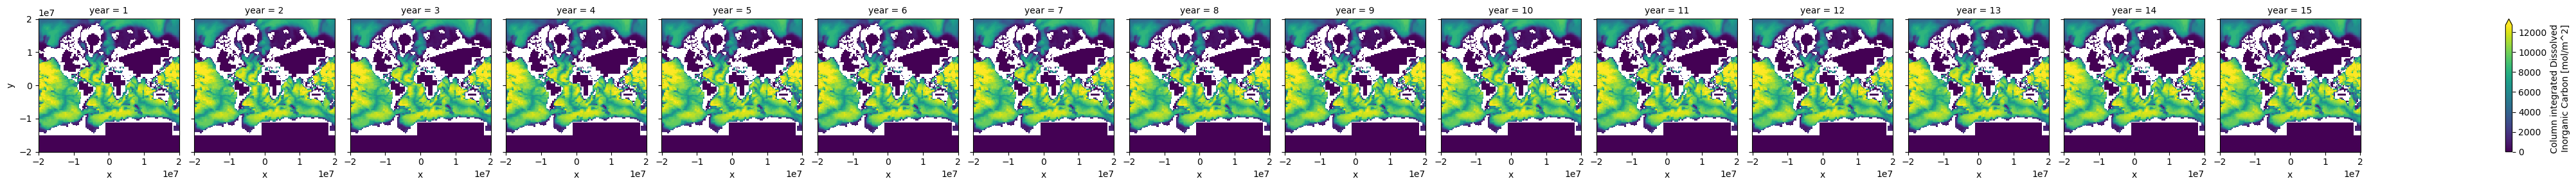

In [23]:
dt['0'].ds.isel(band=1, month=2).DIC.plot(col='year', robust=True)

In [31]:
%%time
dt = create_pyramid(padded_polygon_ids[0])

/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/xarray/core/dataset.py:2794: UserWarning: Dimensions {'z_t'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'nlat': 384, 'nlon': 320, 'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 180, 'band': 2})
  indexers = drop_dims_from_indexers(indexers, self.dims, missing_dims)
/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 14.45 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


finished processing polygon_id=000, injection_month=01


/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/xarray/core/dataset.py:2794: UserWarning: Dimensions {'z_t'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'nlat': 384, 'nlon': 320, 'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 180, 'band': 2})
  indexers = drop_dims_from_indexers(indexers, self.dims, missing_dims)
/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 14.44 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


finished processing polygon_id=000, injection_month=04


/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/xarray/core/dataset.py:2794: UserWarning: Dimensions {'z_t'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'nlat': 384, 'nlon': 320, 'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 180, 'band': 2})
  indexers = drop_dims_from_indexers(indexers, self.dims, missing_dims)
/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 14.43 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


finished processing polygon_id=000, injection_month=07


/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/xarray/core/dataset.py:2794: UserWarning: Dimensions {'z_t'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'nlat': 384, 'nlon': 320, 'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 180, 'band': 2})
  indexers = drop_dims_from_indexers(indexers, self.dims, missing_dims)
/global/homes/a/abanihi/.conda/envs/dor/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 14.45 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


finished processing polygon_id=000, injection_month=10
CPU times: user 1min 3s, sys: 1.84 s, total: 1min 5s
Wall time: 20min 44s


In [17]:
# bands_ds = ds.pipe(reduction).pipe(concatenate_into_bands).pipe(reshape_into_month_year)
# bands_ds

In [18]:
# %%time

# other_chunks = dict(month=1, year=-1, band=1, polygon_id=1, injection_date=1, x=128, y=128)
# pyramid = ndpyramid.pyramid_regrid(
#     bands_ds.chunk(nlat=-1, nlon=-1),
#     levels=2,
#     projection="web-mercator",
#     parallel_weights=False,
#     other_chunks=other_chunks,
# )

# pyramid = dask.optimize(pyramid)[0]
# pyramid

In [19]:
# pyramid["0"]["FG"].sel(band="experimental").isel(
#     month=0, year=0, polygon_id=0, injection_date=0
# ).plot(robust=True)

In [20]:
# %%time
# path = 's3://carbonplan-dor-efficiency/store2.zarr'
# pyramid.to_zarr(path, region='auto', mode='r+')

In [3]:
path = "s3://carbonplan-dor-efficiency/store2.zarr"
path2 = "s3://carbonplan-oae-efficiency/v2/store2.zarr/"
# path = '/pscratch/sd/a/abanihi/store2.zarr'
dt = xr.open_datatree(path, engine="zarr", chunks={})
dt

<xarray.DataTree>
Group: /
│   Attributes:
│       multiscales:  [{'datasets': [{'crs': 'EPSG:3857', 'level': 0, 'path': '0'...
│       title:        multiscale data pyramid
│       version:      0.4.0
├── Group: /0
│       Dimensions:         (polygon_id: 690, band: 2, injection_date: 4, month: 12,
│                            year: 15, y: 128, x: 128)
│       Coordinates:
│         * band            (band) <U12 96B 'delta' 'experimental'
│           dz              float32 4B ...
│           elapsed_time    (month, year) float32 720B dask.array<chunksize=(1, 15), meta=np.ndarray>
│         * injection_date  (injection_date) float64 32B 1.0 4.0 7.0 10.0
│         * month           (month) float64 96B 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
│         * polygon_id      (polygon_id) float64 6kB 0.0 1.0 2.0 ... 687.0 688.0 689.0
│         * x               (x) float32 512B -1.988e+07 -1.957e+07 ... 1.988e+07
│         * y               (y) float32 512B 1.988e+07 1.957e+07 ... -1.988e+07
│         * year            (year) float64 120B 1.0 2.0 3.0 4.0 ... 12.0 13.0 14.0 15.0
│       Data variables:
│           DIC             (polygon_id, band, injection_date, month, year, y, x) float32 65GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
│           DIC_INTEGRATED  (polygon_id, band, injection_date, month, year, y, x) float32 65GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
│           PH              (polygon_id, band, injection_date, month, year, y, x) float32 65GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
│           FG              (polygon_id, band, injection_date, month, year, y, x) float32 65GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
│           pCO2SURF        (polygon_id, band, injection_date, month, year, y, x) float32 65GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
│       Attributes:
│           multiscales:    [{'datasets': [{'crs': 'EPSG:3857', 'level': 0, 'path': '...
│           regrid_method:  bilinear
└── Group: /1
        Dimensions:         (polygon_id: 690, band: 2, injection_date: 4, month: 12,
                             year: 15, y: 256, x: 256)
        Coordinates:
            dz              float32 4B ...
          * band            (band) <U12 96B 'delta' 'experimental'
            elapsed_time    (month, year) float32 720B dask.array<chunksize=(1, 15), meta=np.ndarray>
          * injection_date  (injection_date) float64 32B 1.0 4.0 7.0 10.0
          * month           (month) float64 96B 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0 12.0
          * polygon_id      (polygon_id) float64 6kB 0.0 1.0 2.0 ... 687.0 688.0 689.0
          * x               (x) float32 1kB -1.996e+07 -1.98e+07 ... 1.98e+07 1.996e+07
          * y               (y) float32 1kB 1.996e+07 1.98e+07 ... -1.98e+07 -1.996e+07
          * year            (year) float64 120B 1.0 2.0 3.0 4.0 ... 12.0 13.0 14.0 15.0
        Data variables:
            DIC             (polygon_id, band, injection_date, month, year, y, x) float32 260GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
            DIC_INTEGRATED  (polygon_id, band, injection_date, month, year, y, x) float32 260GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
            PH              (polygon_id, band, injection_date, month, year, y, x) float32 260GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
            pCO2SURF        (polygon_id, band, injection_date, month, year, y, x) float32 260GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
            FG              (polygon_id, band, injection_date, month, year, y, x) float32 260GB dask.array<chunksize=(1, 1, 1, 1, 15, 128, 128), meta=np.ndarray>
        Attributes:
            multiscales:    [{'datasets': [{'crs': 'EPSG:3857', 'level': 1, 'path': '...
            regrid_method:  bilinear

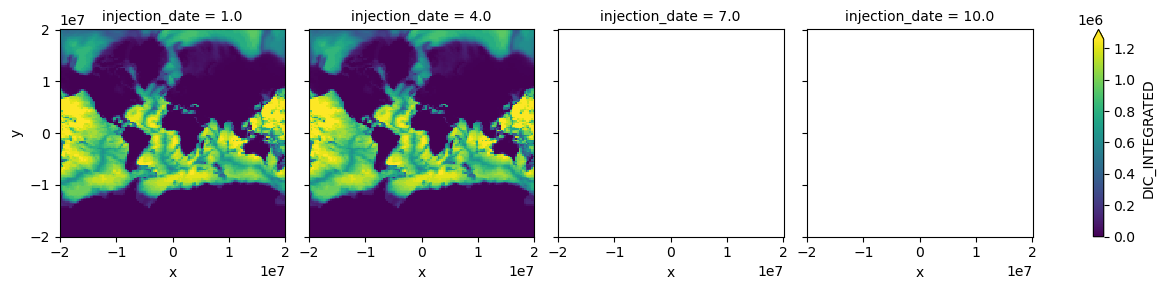

In [18]:
dt["0"]["DIC_INTEGRATED"].sel(band="experimental").isel(
    month=0, year=0, polygon_id=1
).plot(col="injection_date", robust=True)

In [6]:
dt["0"]["DIC_INTEGRATED"].encoding

{'chunks': (1, 1, 1, 1, 15, 128, 128),
 'preferred_chunks': {'polygon_id': 1,
  'band': 1,
  'injection_date': 1,
  'month': 1,
  'year': 15,
  'y': 128,
  'x': 128},
 'compressors': (Zlib(level=1),),
 'filters': (),
 'shards': None,
 '_FillValue': np.float32(9.96921e+36),
 'dtype': dtype('float32'),
 'coordinates': 'elapsed_time'}